<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagnóstico</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - María Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [33]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

In [ ]:
def mostrar_informe(df):
    print("Informe estadístico de la base de datos")
    print("="*50, "\n")
    
    # 1. Información general
    print(f"Número de registros: {df.shape[0]}")
    print(f"Número de columnas: {df.shape[1]}\n")
    
    # 2. Valores nulos por columna
    print("Valores nulos por columna:")
    print(df.isna().sum())
    print("\n")
    
    # 3. Valores únicos por columna
    print("Número de valores únicos por columna:")
    print(df.nunique())
    print("\n")
    
    # 4. Estadísticas descriptivas para columnas numéricas
    print("Estadísticas descriptivas (numéricas):")
    print(df.describe())
    print("\n")
    
    # 5. Frecuencias para variables categóricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print("Frecuencias para variables categóricas:")
        for col in cat_cols:
            print(f"\nColumna: {col}")
            print(df[col].value_counts(dropna=False))
    else:
        print("No se encontraron columnas categóricas.")

<hr>

# Inspección de la base de datos

In [15]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M


## **Informe Estadístico Inicial de la Base de Datos**

In [32]:
df_informe = pd.read_excel(archivo_excel, engine='openpyxl')
mostrar_informe(df_informe)

Informe estadístico de la base de datos

Número de registros: 27869
Número de columnas: 68

Valores nulos por columna:
Num caso                     1
Aseguradora -Código-         0
Aseguradora -Descripción-    0
Edad                         0
Grupo Edad                   0
                            ..
Infecciones                  0
Infección Quirurgica         0
GRD -Código                  0
GRD -Descripción             0
Tipo GRD                     0
Length: 68, dtype: int64


Número de valores únicos por columna:
Num caso                     7900
Aseguradora -Código-           62
Aseguradora -Descripción-      71
Edad                          108
Grupo Edad                     20
                             ... 
Infecciones                     4
Infección Quirurgica            4
GRD -Código                   608
GRD -Descripción              608
Tipo GRD                        4
Length: 68, dtype: int64


Estadísticas descriptivas (numéricas):
            Num caso  Aseguradora -

## 1. Descripción General

- **Número total de registros:** 27,869
- **Número total de columnas:** 68

Este informe presenta un análisis descriptivo preliminar con el fin de entender la estructura, calidad y características generales del conjunto de datos.



## 2. Calidad de los Datos

- **Valores nulos por columna:**
    
    La mayoría de las columnas no presentan valores nulos. Se identifica 1 registro con valor nulo en la columna `Num caso`.
      



## 3. Distribución de Datos Categóricos

Se presentan las frecuencias de las principales variables categóricas para identificar posibles valores atípicos o inconsistencias, además de observar la distribución general:

- **Sexo:**
    - Masculino (M): 14,353
    - Femenino (F): 13,512
    - Valores inconsistentes (m, f): 4 (corregir para homogeneizar)
- **Tipo de ingreso:**
    - Urgencia: 25,570
    - Programado: 2,294
    - Valores inconsistentes (variaciones en mayúsculas/minúsculas): corregir para uniformidad
- **Cuidados intensivos:**
    - NO: 26,681
    - SI: 1,182
    - Valores inconsistentes (variaciones en mayúsculas/minúsculas): corregir
- **Grupo Etario:**
    
    Distribución detallada por rangos de edad, destacando grupos mayores (75-79, 80-84 años) con mayor frecuencia.
    
- **Aseguradora:**
    
    71 categorías, con 5 aseguradoras predominantes que concentran la mayoría de los registros.
    
- **Diagnósticos (Dx principal y Dxr 1-9):**
    
    Amplia variedad con valores NaN significativos en las últimas columnas de diagnósticos secundarios.
    


## 4. Estadísticas Descriptivas para Variables Numéricas

- **Edad:**
    - Media: 57.7 años
    - Rango: 0 a 109 años
    - Desviación estándar: 24.17
- **Días de estancia hospitalaria:**
    - Media: 8.45 días
    - Rango: 0 a 174 días
    - Mediana: 6 días
- **Días en Unidad de Cuidados Intensivos:**
    - Media: 0.38 días
    - Alta dispersión con máximo de 92 días, pero la mayoría sin estancia en UCI.
    
- **Variables de Procedimientos (Proc22 a Proc30):**
    
    Presentan muchos valores faltantes (solo disponibles en pocas observaciones), con medias alrededor de 83-89 y alta variabilidad en algunos casos. Se debe evaluar relevancia para análisis futuros.
    



## 5. Observaciones Generales
- Unificar formatos en variables categóricas (ej. mayúsculas/minúsculas).
- Tratar valores faltantes, en particular en columnas diagnósticas y procedimientos.
- Validar posibles registros duplicados.
- Eliminar categorías muy específicas o poco frecuentes en variables categóricas para evitar ruido.



## 6. Conclusiones preliminares

El dataset es amplio y contiene información clínica valiosa. Se evidencia buena calidad general en términos de datos faltantes, salvo excepciones puntuales. La distribución etaria y los diagnósticos principales presentan un perfil coherente para un estudio de análisis de gestión hospitalaria. Sin embargo, es imprescindible realizar un proceso de limpieza y transformación para garantizar la calidad y precisión en análisis posteriores.

<hr>

# **Limpieza de la base de datos**

In [ ]:
# ====================================================================
# 1. LIMPIEZA BÁSICA DE TEXTO
# ====================================================================
# Se estandarizan los textos a mayúsculas y se eliminan las tildes,
# aplicando esta limpieza únicamente a las columnas de tipo string
# (sin afectar columnas numéricas). Además, se normalizan los nombres 
# de las columnas.
# ====================================================================

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

df.head()


C:\Users\luisa\AppData\Local\Temp\ipykernel_14304\3916341611.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [17]:
# ================================================================
# 2. ANÁLISIS DE CALIDAD DE LAS COLUMNAS
# ================================================================
# Se realiza un diagnóstico exploratorio por columna que incluye:
# - Conteo de valores nulos
# - Número de valores únicos
# - Ejemplos representativos de valores
# - Identificación de columnas con baja utilidad (e.g., constantes)
# ================================================================

print('--- Valores NaN por columna ---')
print(df.isna().sum())

descripcion_columnas = []
for col in df.columns:
    valores_unicos = df[col].nunique(dropna=True)
    muestra_valores = df[col].unique()[:5]
    descripcion_columnas.append({
        'columna': col,
        'valores_unicos': valores_unicos,
        'muestra_valores': muestra_valores
    })

print('\n--- Resumen de columnas ---')
for desc in descripcion_columnas:
    print(f"Columna: {desc['columna']}")
    print(f"  Valores únicos: {desc['valores_unicos']}")
    print(f"  Ejemplo de valores: {desc['muestra_valores']}")
    if desc['valores_unicos'] == 1:
        print('  -> ¡OJO! Solo hay un valor único.')
    print()
df.head()

--- Valores NaN por columna ---
NUM CASO                     1
ASEGURADORA -CODIGO-         0
ASEGURADORA -DESCRIPCION-    0
EDAD                         0
GRUPO EDAD                   0
                            ..
INFECCIONES                  0
INFECCION QUIRURGICA         0
GRD -CODIGO                  0
GRD -DESCRIPCION             0
TIPO GRD                     0
Length: 68, dtype: int64

--- Resumen de columnas ---
Columna: NUM CASO
  Valores únicos: 7900
  Ejemplo de valores: [413799. 412359. 412552. 414131. 410573.]

Columna: ASEGURADORA -CODIGO-
  Valores únicos: 62
  Ejemplo de valores: [204 313 227 112 221]

Columna: ASEGURADORA -DESCRIPCION-
  Valores únicos: 71
  Ejemplo de valores: ['ASEGURADORA_29' 'ASEGURADORA_56' 'ASEGURADORA_46' 'ASEGURADORA_21'
 'ASEGURADORA_28']

Columna: EDAD
  Valores únicos: 108
  Ejemplo de valores: [38 27 39 24 60]

Columna: GRUPO EDAD
  Valores únicos: 20
  Ejemplo de valores: ['35-39' '25-29' '20-24' '60-64' '75-79']

Columna: SEXO
  Valore

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [18]:
# =============================================================================
# 3. NORMALIZACIÓN DE VALORES EQUIVALENTES
# =============================================================================
# Se unifican valores semánticamente equivalentes que presentan
# diferencias en su escritura. Ejemplo: "URGENCIAS PEDIATRICAS" → "URGENCIA".
# Esta etapa mejora la consistencia y reduce la cardinalidad de las categorías.
# =============================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("Valores equivalentes normalizados.")
df.head()

Valores equivalentes normalizados.

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [19]:
# ==========================================================================
# 4. ELIMINACIÓN DE COLUMNAS PROBLEMÁTICAS
# ==========================================================================
# Se descartan columnas que aportan poco valor al análisis:
# - Columnas con más del 70% de valores nulos
# - Columnas con un único valor distinto (baja variabilidad)
# - Columnas administrativas o irrelevantes para el objetivo del análisis
# ==========================================================================

# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]

# Columnas irrelevantes conocidas
columnas_irrelevantes = [
    'NUM CASO', 'ASEGURADORA -CODIGO-', 'ASEGURADORA -DESCRIPCION-', 'CODIGO DE CIUDAD',
    'FECHA DE EGRESO', 'CODIGO CAUSA EXTERNA', 'DIAS ESTANCIA', 'SERVICIOALTA',
    'CUIDADOS INTENSIVOS', 'DIAS DE UNIDAD CUIDADO INTENSIVO',
    'SITUACION AL ALTA', 'CAUSA BASICA DE MUERTE', 'INFECCIONES',
    'INFECCION QUIRURGICA', 'DX PRINCIPAL DE EGRESO ', 'DX PRINCIPAL DE EGRESO .1',
    'TIPO SERVICIO', 'PROC1','PROC2','PROC3', 'GRD -DESCRIPCION', 'TIPO GRD','GRUPO EDAD','DX DE INGRESO'
]

# Unificar y eliminar
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor + columnas_irrelevantes))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: ['CODIGO DE CIUDAD', 'TIPO SERVICIO', 'DX PRINCIPAL DE EGRESO .1', 'TIPO GRD', 'INFECCION QUIRURGICA', 'PROC6', 'PROC11', 'PROC30', 'PROC23', 'FECHA DE EGRESO', 'PROC24', 'PROC22', 'PROC9', 'PROC7', 'PROC17', 'PROC29', 'PROC2', 'PROC27', 'PROC18', 'PROC5', 'PROC16', 'CAUSA BASICA DE MUERTE', 'PROC3', 'ASEGURADORA -DESCRIPCION-', 'PROC14', 'PROC20', 'PROC19', 'DIAS ESTANCIA', 'PROC1', 'DXR 9', 'DIAS DE UNIDAD CUIDADO INTENSIVO', 'SITUACION AL ALTA', 'PROC12', 'PROC4', 'GRUPO EDAD', 'PROC10', 'PROC15', 'CODIGO CAUSA EXTERNA', 'PROC21', 'CUIDADOS INTENSIVOS', 'CAUSA EXTERNA', 'DX PRINCIPAL DE EGRESO ', 'NUM CASO', 'SERVICIOALTA', 'GRD -DESCRIPCION', 'PROC28', 'DX DE INGRESO', 'PROC26', 'ASEGURADORA -CODIGO-', 'PROC8', 'DXR 7', 'DXR 10 ', 'INFECCIONES', 'PROC13', 'DXR 8', 'PROC25']


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,38,F,30052005,URGENCIA,INFARTO CEREBRAL,I652,C189,C787,C788,N390,A048,14143
1,27,M,11032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B210,B204,B162,A530,D538,A071,184153
2,39,M,20032005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B451,G052,B588,D70,D698,A072,184153
3,24,M,20062005,URGENCIA,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,B200,B210,A600,N518,A530,A073,184153
4,60,M,24112004,URGENCIA,COMPLICACIONES DE PROCEDIMIENTOS NO CLASIFICAD...,Y838,C140,N390,B961,B962,A099,184112


In [20]:
# ================================================================
# 5. CODIFICACIÓN DE VARIABLES
# ================================================================
# - Variables binarias: codificar con 0 y 1.
# - Variables categóricas frecuentes: codificar por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# Codificación binaria
df['SEXO'] = df['SEXO'].map({'F': 0, 'M': 1})
df['TIPO DE INGRESO'] = df['TIPO DE INGRESO'].map({'PROGRAMADO': 0, 'URGENCIA': 1})

# Codificación por frecuencia
columnas_frecuencia = [
    'EDAD', 'FECHA DE INGRESO', 'DX DE INGRESO', 'DX PPAL 3 CARACTERES',
    'DXR 1', 'DXR 2', 'DXR 3', 'DXR 4', 'DXR 5', 'DXR-6','GRD -CODIGO'
]
for col in columnas_frecuencia:
    if col in df.columns:
        df[col] = df[col].map(df[col].value_counts())
df.head()


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,200,0,81,1,92,26.0,18.0,21.0,3.0,95.0,2.0,54
1,231,1,85,1,13,8.0,7.0,1.0,9.0,7.0,1.0,59
2,176,1,88,1,10,2.0,2.0,1.0,78.0,10.0,1.0,59
3,251,1,64,1,127,11.0,3.0,10.0,8.0,2.0,1.0,59
4,408,1,2,1,226,269.0,1.0,256.0,77.0,71.0,31.0,55


In [21]:
# ================================================================
# 6. NORMALIZACIÓN MIN-MAX
# ================================================================
# - Se imputan NaN con 0
# - Se suma un pequeño epsilon para evitar ceros exactos
# - Se aplica MinMaxScaler para escalar al rango [0, 1]
# - Se reconstruye el DataFrame con los nombres originales
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores para que el 1 no quede en el mínimo
epsilon = 1e-3  # Pequeño valor positivo para evitar que 1 se convierta en 0
df_adjusted = df_clean + epsilon

# 3. Normalización Min-Max
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_adjusted)

# 4. Crear DataFrame con nombres originales
df_f = pd.DataFrame(df_scaled, columns=df.columns)

# 5. Confirmación
print("Normalización Min-Max aplicada.")
df_f.head()

Normalización Min-Max aplicada.


,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,0.336717,0.0,0.720721,1.0,0.066423,0.018895,0.009793,0.012774,0.002669,0.135714,0.003781,0.072503
1,0.389171,1.0,0.756757,1.0,0.008759,0.005814,0.003808,0.000608,0.008007,0.010000,0.001890,0.079343
2,0.296108,1.0,0.783784,1.0,0.006569,0.001453,0.001088,0.000608,0.069395,0.014286,0.001890,0.079343
3,0.423012,1.0,0.567568,1.0,0.091971,0.007994,0.001632,0.006083,0.007117,0.002857,0.001890,0.079343
4,0.688663,1.0,0.009009,1.0,0.164234,0.195494,0.000544,0.155718,0.068505,0.101429,0.058601,0.073871


## **Guardar Base de datos limpia**



In [22]:
# ==============================================================================
# 7. GUARDADO FINAL
# ==============================================================================
# Se guarda el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ==============================================================================

df_f.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


Archivo guardado como 'DataBaseFinal_Normalizado.csv'


<hr>

# **Informe del análisis estadístico hecho a la base de datos limpia**

In [31]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_informe_limpio = pd.read_csv(archivo_csv,sep=';')
mostrar_informe(df_informe_limpio)

Informe estadístico de la base de datos

Número de registros: 27869
Número de columnas: 12

Valores nulos por columna:
EDAD                    0
SEXO                    0
FECHA DE INGRESO        0
TIPO DE INGRESO         0
DX PPAL 3 CARACTERES    0
DXR 1                   0
DXR 2                   0
DXR 3                   0
DXR 4                   0
DXR 5                   0
DXR-6                   0
GRD -CODIGO             0
dtype: int64


Número de valores únicos por columna:
EDAD                    100
SEXO                      2
FECHA DE INGRESO         90
TIPO DE INGRESO           2
DX PPAL 3 CARACTERES    136
DXR 1                   121
DXR 2                   117
DXR 3                   105
DXR 4                   106
DXR 5                    99
DXR-6                    83
GRD -CODIGO             144
dtype: int64


Estadísticas descriptivas (numéricas):
               EDAD          SEXO  FECHA DE INGRESO  TIPO DE INGRESO  \
count  27869.000000  27869.000000      27869.000000   

## 1. Descripción General

- **Número total de registros:** 27,869
- **Número total de columnas:** 12

La base de datos analizada contiene 27.869 registros distribuidos en 12 variables, correspondientes a información clínica y administrativa de pacientes hospitalizados. Las variables incluyen datos sociodemográficos (edad, sexo), administrativos (fecha y tipo de ingreso), diagnósticos principales y relacionados (DX), así como el código GRD correspondiente.

**Nota:** Los valores han sido normalizados (escala de 0 a 1). Esto implica que las interpretaciones deben realizarse considerando dicha transformación.


## 2. Calidad de los Datos

No se encontraron valores nulos en ninguna de las variables, lo cual indica un excelente nivel de completitud.
      
## 3. Distribución de Datos Categóricos

Las variables de diagnóstico y el código GRD muestran una alta diversidad, lo cual evidencia una variedad importante de condiciones clínicas presentes en la población.
    

## 4. Estadísticas Descriptivas para Variables Numéricas

Dado que los datos han sido preprocesados mediante normalización (min-max scaling entre 0 y 1), las estadísticas representan distribuciones relativas que preservan la forma de los datos originales.
    

## 5. Observaciones Generales
- Las variables SEXO y TIPO DE INGRESO presentan una distribución binaria, donde más del 90% de los registros tienen valor "1" en TIPO DE INGRESO.
- La edad muestra una distribución asimétrica hacia la derecha (mayoría de pacientes en edades medias-altas).
- Los diagnósticos relacionados DXR2 a DXR6 tienden a tener valores bajos, lo que sugiere que muchos pacientes no presentan múltiples diagnósticos asociados, o estos tienen baja frecuencia relativa.

## 6. Conclusiones preliminares

La base de datos ha sido completamente preprocesada y se encuentra en óptimas condiciones para su uso en algoritmos de análisis y modelado, ya que no contiene valores nulos, las variables han sido normalizadas entre 0 y 1, y tanto las variables numéricas como las categóricas están estructuradas y codificadas adecuadamente para garantizar compatibilidad con técnicas de aprendizaje.

<hr>

## EJEMPLO SANTIAGO

In [23]:
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================================================================
# ETAPA 1: Selección de variables predictoras (X) y variable objetivo (y)
# ============================================================================
# Usamos el DataFrame ya normalizado (df_f) para X.
# La salida (y) es 'GRD -CODIGO', sin normalizar.
X = df_f.drop(columns=['GRD -CODIGO'])
y = df['GRD -CODIGO']  # La etiqueta original (no normalizada)

# ============================================================================
# ETAPA 2: Imputación de valores faltantes en X (solo si hay NaNs)
# ============================================================================
# Algunos modelos (como LogisticRegression) no aceptan NaNs.
# Imputamos con la media para variables numéricas.
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Restauramos X como DataFrame con sus columnas originales
X = pd.DataFrame(X_imputado, columns=X.columns)

# ============================================================================
# ETAPA 3: División del dataset en entrenamiento y prueba
# ============================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================================================
# ETAPA 4: Definición de modelos de clasificación
# ============================================================================
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# ============================================================================
# ETAPA 5: Entrenamiento, predicción y evaluación de cada modelo
# ============================================================================
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

    # Resultados individuales por modelo
    print(f"\n📊 Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

# ============================================================================
# ETAPA 6: Comparación general de accuracy entre modelos
# ============================================================================
print("\n=== Comparación de Accuracy ===")
for nombre, acc in resultados.items():
    print(f"{nombre}: {acc:.4f}")


'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, confusion_matrix\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.impute import SimpleImputer\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\n\n# ============================================================================\n# ETAPA 1: Selección de variables predictoras (X) y variable objetivo (y)\n# ============================================================================\n# Usamos el DataFrame ya normalizado (df_f) para X.\n# La salida (y) es \'GRD -CODIGO\', sin normalizar.\nX = df_f.drop(columns=[\'GRD -CODIGO\'])\ny = df[\'GRD -CODIGO\']  # La etiqueta original (no normalizada)\n\n# ============================================================================\n# ETAPA 2: Imputación 

In [24]:
'''
print("Número de clases:", y.nunique())
print("Distribución de clases:")
print(y.value_counts(normalize=True).head(10))
'''

'\nprint("Número de clases:", y.nunique())\nprint("Distribución de clases:")\nprint(y.value_counts(normalize=True).head(10))\n'

<hr>

# Árbol de decisión - M 

<hr>
<h1> Random Forest - L </h1>

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

### Carga del archivo csv (DataSet)

In [37]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_inf = pd.read_csv(archivo_csv,sep=';')
df_inf.head()

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6,GRD -CODIGO
0,0.336717,0.0,0.720721,1.0,0.066423,0.018895,0.009793,0.012774,0.002669,0.135714,0.003781,0.072503
1,0.389171,1.0,0.756757,1.0,0.008759,0.005814,0.003808,0.000608,0.008007,0.010000,0.001890,0.079343
2,0.296108,1.0,0.783784,1.0,0.006569,0.001453,0.001088,0.000608,0.069395,0.014286,0.001890,0.079343
3,0.423012,1.0,0.567568,1.0,0.091971,0.007994,0.001632,0.006083,0.007117,0.002857,0.001890,0.079343
4,0.688663,1.0,0.009009,1.0,0.164234,0.195494,0.000544,0.155718,0.068505,0.101429,0.058601,0.073871


####  Características o Variables de entrada (Features)

In [42]:
X_RF = df.iloc[:,:11]
X_RF.head(5)

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
0,200,0,81,1,92,26.0,18.0,21.0,3.0,95.0,2.0
1,231,1,85,1,13,8.0,7.0,1.0,9.0,7.0,1.0
2,176,1,88,1,10,2.0,2.0,1.0,78.0,10.0,1.0
3,251,1,64,1,127,11.0,3.0,10.0,8.0,2.0,1.0
4,408,1,2,1,226,269.0,1.0,256.0,77.0,71.0,31.0


####  Etiquetas, Clases o Salida (Target)

In [77]:
Y_RF = df_inf.iloc[:, 11]
Y_RF.head(5)

0    0.072503
1    0.079343
2    0.079343
3    0.079343
4    0.073871
Name: GRD -CODIGO, dtype: float64

##  Análisis Exploratorio

In [44]:
X_RF.describe()

,EDAD,SEXO,FECHA DE INGRESO,TIPO DE INGRESO,DX PPAL 3 CARACTERES,DXR 1,DXR 2,DXR 3,DXR 4,DXR 5,DXR-6
count,27869.000000,27869.000000,27869.000000,27869.000000,27869.000000,27172.000000,24714.000000,21529.000000,17983.000000,14451.000000,11163.000000
mean,368.654814,0.515088,77.691234,0.917650,335.752521,185.637126,254.945699,252.457662,202.104599,157.292852,123.588731
std,148.613674,0.499781,16.165293,0.274901,396.734715,312.721029,471.906880,425.622651,280.596997,186.625296,145.526179
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,219.000000,0.000000,68.000000,1.000000,51.000000,14.000000,17.000000,19.000000,21.000000,21.000000,16.000000
50%,394.000000,1.000000,80.000000,1.000000,166.000000,63.000000,77.000000,90.000000,90.000000,80.000000,66.000000
75%,504.000000,1.000000,88.000000,1.000000,486.000000,196.000000,239.000000,279.000000,275.000000,256.000000,180.000000
max,592.000000,1.000000,112.000000,1.000000,1371.000000,1376.000000,1838.000000,1644.000000,1124.000000,700.000000,529.000000


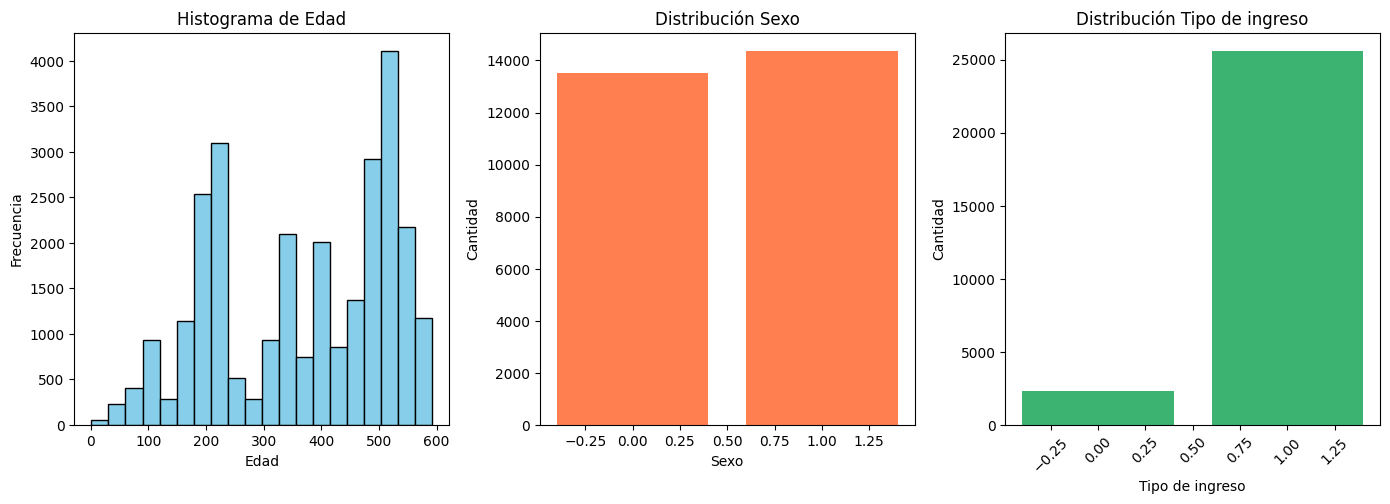

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5))  # 1 fila, 3 columnas

# 1. Histograma Edad
axs[0].hist(X_RF['EDAD'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Histograma de Edad")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel("Frecuencia")

# 2. Distribución Sexo (variable categórica)
sex_counts = X_RF['SEXO'].value_counts()
axs[1].bar(sex_counts.index, sex_counts.values, color='coral')
axs[1].set_title("Distribución Sexo")
axs[1].set_xlabel("Sexo")
axs[1].set_ylabel("Cantidad")

# 3. Distribución Tipo de ingreso (variable categórica)
tipo_counts = X_RF['TIPO DE INGRESO'].value_counts()
axs[2].bar(tipo_counts.index, tipo_counts.values, color='mediumseagreen')
axs[2].set_title("Distribución Tipo de ingreso")
axs[2].set_xlabel("Tipo de ingreso")
axs[2].set_ylabel("Cantidad")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



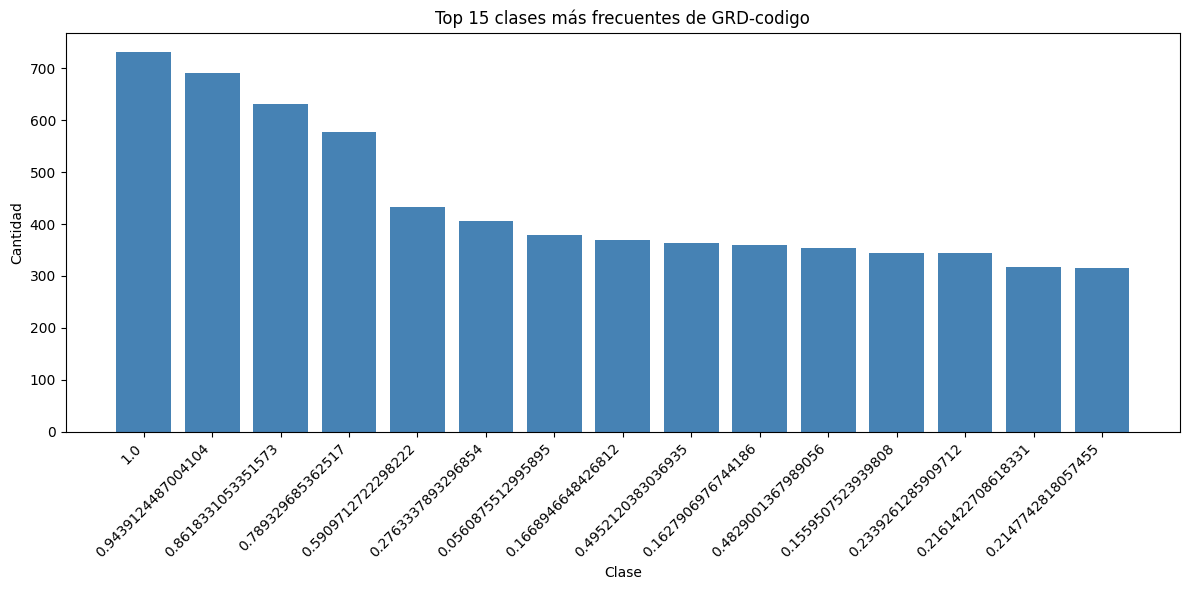

In [ ]:
top_n = 15  # 15 clases con más muestras
top_classes = Y_RF.value_counts().head(top_n)

plt.figure(figsize=(12,6))
plt.bar(top_classes.index.astype(str), top_classes.values, color='steelblue')
plt.title(f"Top {top_n} clases más frecuentes de GRD-codigo")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Separación de muestras para train y test

In [78]:
X_train_RF , X_test_RF , Y_train_RF , Y_test_RF = train_test_split(X_RF, Y_RF)

print("Train: ",X_train_RF.shape , Y_train_RF.shape)
print("Test: ",X_test_RF.shape , Y_test_RF.shape)

Train:  (20901, 11) (20901,)
Test:  (6968, 11) (6968,)


## Definición del modelo RF y entrenamiento

In [79]:
print(Y_train_RF.unique())
print(Y_train_RF.dtype)


[1.         0.05608755 0.01504788 0.0506156  0.09028728 0.0998632
 0.07797538 0.26949384 0.1751026  0.07934337 0.16552668 0.02872777
 0.19835841 0.59097127 0.06429549 0.94391245 0.13953488 0.09165527
 0.05335157 0.19151847 0.21340629 0.00957592 0.12038304 0.0629275
 0.09302326 0.38987688 0.14911081 0.20383037 0.08891929 0.02051984
 0.12995896 0.06155951 0.35978112 0.24213406 0.14227086 0.49521204
 0.38850889 0.00547196 0.04103967 0.27906977 0.03419973 0.48290014
 0.16005472 0.06976744 0.1997264  0.26128591 0.04514364 0.0123119
 0.09712722 0.33515732 0.00410397 0.16826265 0.86183311 0.01094391
 0.24897401 0.32968536 0.27086183 0.15595075 0.22982216 0.11627907
 0.0875513  0.10943912 0.78932969 0.21751026 0.03283174 0.01915185
 0.09849521 0.35157319 0.11764706 0.18331053 0.21614227 0.1504788
 0.10123119 0.04377565 0.14500684 0.00820793 0.02599179 0.16689466
 0.05882353 0.05198358 0.1627907  0.03830369 0.10396717 0.04924761
 0.39671683 0.04651163 0.27633379 0.08207934 0.21477428 0.01641587

In [81]:
_Y_train_RF = Y_train_RF.astype(int)
_Y_test_RF = Y_test_RF.astype(int)
print(_Y_test_RF)

22600    0
24781    0
19378    0
11034    0
12866    0
        ..
26742    0
3244     0
5896     0
19576    0
26137    0
Name: GRD -CODIGO, Length: 6968, dtype: int32


In [83]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_RF , _Y_train_RF)
rf1.score(X_test_RF , _Y_test_RF)

0.9895235361653272

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_RF, Y_train_RF)
score = rf.score(X_test_RF, Y_test_RF)  
print("R^2 score:", score)


R^2 score: 0.6949185797234646


In [64]:
# Lista de árboles
arboles = rf.estimators_
print(f"Número de árboles: {len(arboles)}")

Número de árboles: 100


## KFolds Cross Validation

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

# Validación cruzada con 5 folds y métrica R2
scores = cross_val_score(rf, X_RF, Y_RF, cv=5, scoring='r2')

print("Scores R2 en cada fold:", scores)
print("R2 promedio CV:", np.mean(scores))


Scores R2 en cada fold: [0.74724864 0.66861352 0.66891909 0.70525767 0.71170858]
R2 promedio CV: 0.7003495013770082


## Búsqueda de parámetros usando la GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train_RF, Y_train_RF)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score R2 (CV):", grid_search.best_score_)

# Opcional: evaluar en test
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_RF, Y_test_RF)
print("Score R2 en test con mejor modelo:", test_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}
Mejor score R2 (CV): 0.7143967015461623
Score R2 en test con mejor modelo: 0.6998471889594444


In [67]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 300}

In [68]:
rf_grid = RandomForestRegressor(min_samples_leaf=4, n_estimators= 300)
rf_grid.fit(X_train_RF, Y_train_RF)
score_grid = rf_grid.score(X_test_RF, Y_test_RF)  
print("R^2 score:", score_grid)

R^2 score: 0.6992741106367468


##  Métricas

<hr>
<h1> Regresión Logística - S </h1>

<hr>
<h1> Comparación de los algoritmos </h1>

<hr>
<h2> Conclusiones </h2>